<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 99101943
Name = 'Matin'
Last_Name = 'Alinejad'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root = '.', train = True, download = True, transform = transforms.ToTensor())
test_set = FashionMNIST(root = '.', train = False, download = True, transform = transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 14228738.40it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270980.24it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5033369.68it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11394341.42it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [5]:
## FILL HERE
# input_dim = .....
num_classes = len(train_set.classes)  # 10 classes
input_dim = train_set[0][0].numel()   # 28*28 = 784 pixels

print(f"Number of classes: {num_classes}")
print(f"Input dimension: {input_dim}")

Number of classes: 10
Input dimension: 784


In [6]:
train_loader = DataLoader(train_set, 64, shuffle = True)
test_loader = DataLoader(test_set, 64, shuffle = True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

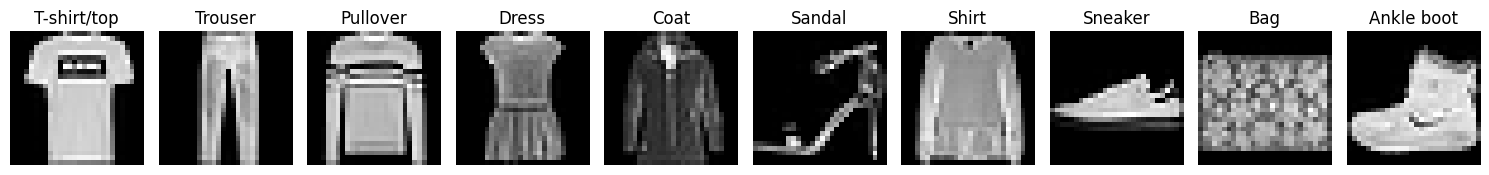

In [7]:
import matplotlib.pyplot as plt

# Define a dictionary to map class indices to class names
class_names = train_set.classes

# Initialize a dictionary to store one image per class
class_images = {class_name: None for class_name in class_names}

# Iterate through the dataset and store one image for each class
for image, label in train_set:
    class_name = class_names[label]
    if class_images[class_name] is None:
        class_images[class_name] = image
    if all(img is not None for img in class_images.values()):
        break

# Plot the images using plt.subplots
fig, axes = plt.subplots(1, len(class_names), figsize = (15, 5))

for idx, class_name in enumerate(class_names):
    ax = axes[idx]
    ax.imshow(class_images[class_name].squeeze(), cmap = 'gray')
    ax.set_title(class_name)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [8]:
def add_linear_layer(parameters: dict, shape, device, i = None):
    """
    This function adds parameters of a linear unit of shape 'shape' to the 'parameters' dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device = device)

        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device = device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True

    # 'i' is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [9]:
# Function to add linear layer parameters
def add_linear_layer(parameters: dict, shape, device, i = None):
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # Kaiming initialization for ReLU activations
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # It will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    parameters.update({f'w{i}': w, f'b{i}': b})

# Input dimension and layers definition
input_dim = 28 * 28  # 784 pixels
num_classes = 10  # FashionMNIST has 10 classes
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# Setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

# Print the keys to verify
print(parameters.keys())

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])


## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:
# Computing affine forward output
def affine_forward(x, w, b):
    """
    Computes the output of a linear transformation y = xW + b
    """
    return x @ w + b

# ReLU activation function
def relu(x):
    """
    Computes the ReLU activation ReLU(x) = max(0, x)
    """
    return torch.max(torch.zeros_like(x), x)

Function `model` returns output of the whole model for the input `x` using the parameters:

In [11]:
def model(x: torch.Tensor, parameters, num_layers = num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    ## FILL HERE
    for i in range(num_layers):
      w = parameters[f'w{i}']
      b = parameters[f'b{i}']
      x = affine_forward(x, w, b)
      if i < num_layers - 1:  # No activation after the last layer
          x = relu(x)

    output = x
    return output

Implementing cross entropy loss:

In [12]:
def cross_entropy_loss(scores, y):
    n = len(y)
    ## FILL HERE

    # Compute the softmax of the scores
    exp_scores = torch.exp(scores - torch.max(scores, dim = 1, keepdim = True).values)
    softmax_probs = exp_scores / exp_scores.sum(dim = 1, keepdim = True)

    # Compute the log probabilities
    log_probs = torch.log(softmax_probs)

    # Compute the negative log likelihood for the correct class
    correct_log_probs = log_probs[range(n), y]

    # Compute the average cross-entropy loss
    loss = -correct_log_probs.mean()

    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [13]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    ## FILL HERE
    for param in parameters.values():
        if param.requires_grad:
            # Update the parameter using its gradient
            param.data -= learning_rate * param.grad
            # Zero the gradient
            param.grad.zero_()

Training functions:

In [14]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    correct = (y_pred == y_true).sum()
    total = len(y_true)
    acc = correct / total

    return acc


def train(train_loader, learning_rate = 0.001, epoch = None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE

        # Calculate the loss
        loss = cross_entropy_loss(p, y)
        train_loss += loss.item()

        # Backward pass to calculate the gradients
        loss.backward()

        # Optimize the model parameters
        sgd_optimizer(parameters, learning_rate)

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

        # Zero the gradients after updating
        for param in parameters.values():
            if param.grad is not None:
                param.grad.zero_()

        # Print the train loss for the current batch
        print(f'Epoch [{epoch+1}], Batch [{i + 1}], Loss: {loss.item()}')

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss / len(train_loader), acc




def validate(loader, epoch = None, set_name = None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    with torch.no_grad():
        for i, (x, y) in enumerate(loader):
            x = x.to(device)
            y = y.to(device)

            # Calculate the model output
            p = model(x, parameters)

            # FILL HERE

            # Calculate the loss
            loss = cross_entropy_loss(p, y)
            total_loss += loss.item()

            # Append predictions and labels for accuracy calculation
            y_pred = p.argmax(dim = -1)
            Y.append(y.cpu().numpy())
            Y_pred.append(y_pred.cpu().numpy())

            # Print the validation loss for the current batch
            print(f'Epoch [{epoch + 1}], Batch [{i + 1}], {set_name} Loss: {loss.item()}')

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [15]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [16]:
def train_model(dataloaders, num_epochs, learning_rate = 0.001, model_name = 'pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists 'train_losses', 'test_losses', 'train_accuracies' and 'test_accuracies'
        # Training
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        val_loss, val_acc = validate(test_loader, epoch, set_name = 'Validation')
        test_losses.append(val_loss)
        test_accuracies.append(val_acc)

        # Print losses and accuracies
        print(f'Epoch [{epoch + 1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

    ## plot the loss history of training and test sets
    ## FILL HERE
    # Plotting loss history
    plt.figure(figsize = (12, 6))
    plt.plot(train_losses, label = 'Train Loss')
    plt.plot(test_losses, label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()
    plt.grid(True)
    plt.show()

    ## plot the accuracy history of training and test sets
    ## FILL HERE
    # Plotting accuracy history
    plt.figure(figsize = (12, 6))
    plt.plot(train_accuracies, label = 'Train Accuracy')
    plt.plot(test_accuracies, label = 'Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()
    plt.grid(True)
    plt.show()

Streaming output truncated to the last 5000 lines.
Epoch [21], Batch [501], Loss: 0.49684256315231323
Epoch [21], Batch [502], Loss: 0.4660537838935852
Epoch [21], Batch [503], Loss: 0.31717485189437866
Epoch [21], Batch [504], Loss: 0.28664594888687134
Epoch [21], Batch [505], Loss: 0.565361738204956
Epoch [21], Batch [506], Loss: 0.5891034007072449
Epoch [21], Batch [507], Loss: 0.41842254996299744
Epoch [21], Batch [508], Loss: 0.3840745687484741
Epoch [21], Batch [509], Loss: 0.4419914484024048
Epoch [21], Batch [510], Loss: 0.3119288980960846
Epoch [21], Batch [511], Loss: 0.17335277795791626
Epoch [21], Batch [512], Loss: 0.4413954019546509
Epoch [21], Batch [513], Loss: 0.484017550945282
Epoch [21], Batch [514], Loss: 0.5988953113555908
Epoch [21], Batch [515], Loss: 0.5234888195991516
Epoch [21], Batch [516], Loss: 0.45789092779159546
Epoch [21], Batch [517], Loss: 0.5344682931900024
Epoch [21], Batch [518], Loss: 0.4173368215560913
Epoch [21], Batch [519], Loss: 0.304787069559

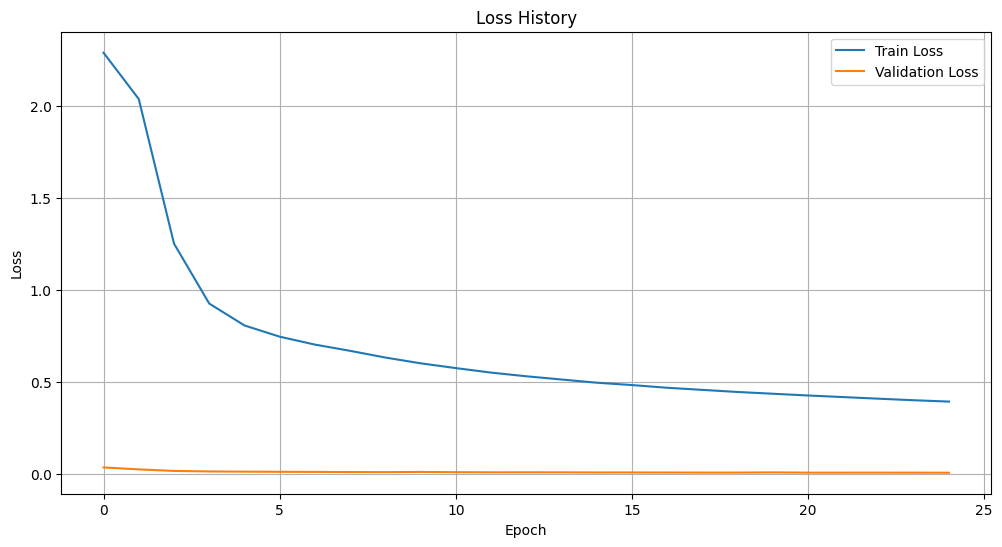

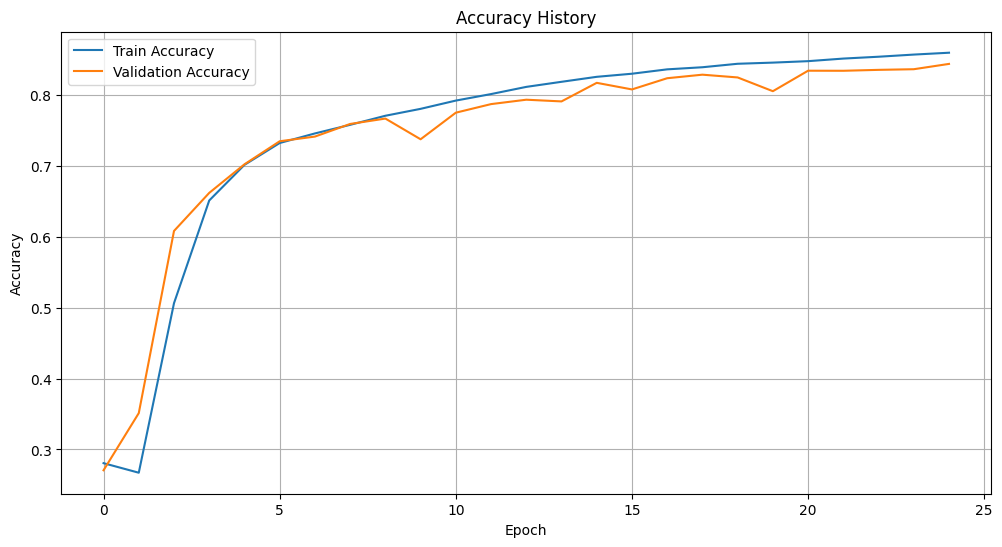

In [17]:
train_model([train_loader, test_loader], num_epochs = 25, learning_rate = 0.005)

In [18]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8438


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

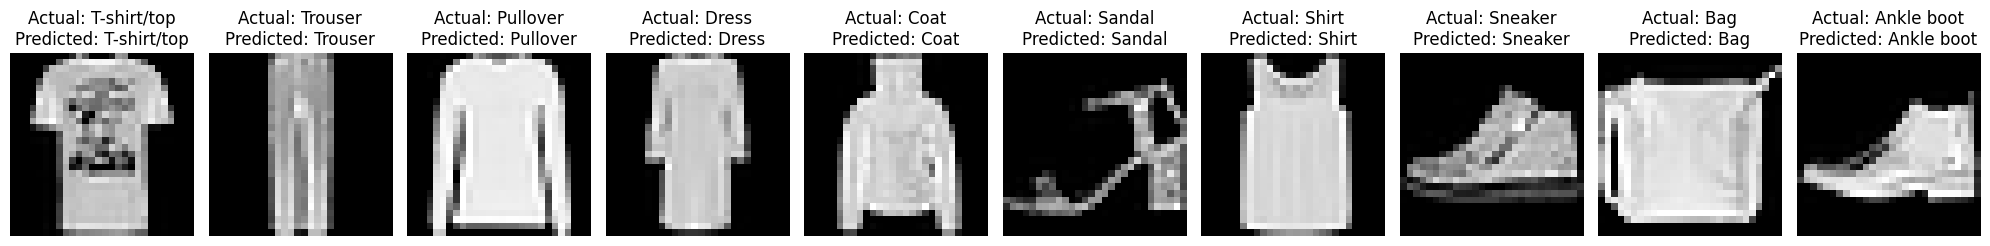

In [22]:
## FILL HERE

# Visualization of the labels and predictions
def visualize_labels_and_predictions(loader, parameters, num_classes = 10):
    """
    Visualizes one image from each class with both the actual label and the predicted label.

    Args:
        loader (DataLoader): DataLoader to fetch the data.
        parameters (Dict[str, torch.Tensor]): Model parameters.
        num_classes (int): Number of classes.
    """
    class_names = train_set.classes
    images_per_class = {class_name: None for class_name in class_names}
    labels_per_class = {class_name: None for class_name in class_names}
    preds_per_class = {class_name: None for class_name in class_names}

    # Iterate through the dataset to get one image per class
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            p = model(x, parameters)
            y_pred = p.argmax(dim = -1)
            for i in range(len(y)):
                class_name = class_names[y[i].item()]
                if images_per_class[class_name] is None:
                    images_per_class[class_name] = x[i].cpu()
                    labels_per_class[class_name] = y[i].item()
                    preds_per_class[class_name] = y_pred[i].item()
                # Check if we have found images for all classes
                if all(img is not None for img in images_per_class.values()):
                    break
            if all(img is not None for img in images_per_class.values()):
                break

    # Plotting the images
    fig, axes = plt.subplots(1, num_classes, figsize = (20, 5))
    for idx, class_name in enumerate(class_names):
        ax = axes[idx]
        ax.imshow(images_per_class[class_name].squeeze(), cmap = 'gray')
        actual_label = labels_per_class[class_name]
        predicted_label = preds_per_class[class_name]
        ax.set_title(f"Actual: {class_names[actual_label]}\nPredicted: {class_names[predicted_label]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_labels_and_predictions(test_loader, parameters)